In [ ]:
# Foreign Language Movies, predict Domestic Revenue based on "active player" involvement 
# active player: US Studios, Directors, Actors, etc.

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

!conda install beautifulsoup4 --yes

from bs4 import BeautifulSoup

#0 for scraping ff list
#installs vi bash
!conda install requests --yes
import requests

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/jamesmcglone/anaconda2:
#
beautifulsoup4            4.5.1                    py27_0  
Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/jamesmcglone/anaconda2:
#
requests                  2.11.1                   py27_0  


In [364]:
#URL page number NOT looped, need to input by hand for each page or creat loop
url = 'http://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=19&id=foreign.htm'

response = requests.get(url)
response.status_code

200

In [365]:
page = response.text
soup = BeautifulSoup(page)
# convert html file into string
soupstring = str(soup) 
type(soupstring)

str

In [366]:
#find movies from foreign language film list
#place movie page location in list for scraping
#regex to the rescue, for real!
import re
matches = re.findall(r'\"/movies/\?id=.+\"', soupstring)

movie_list = []
count = 0
for match in matches:
    
    if count >= 1 and count <= 100:
        movie_list.append(match)
    
    count += 1
    
#clean movie names for later
movie_file_names = []
for movie in movie_list:
    cut_movie = movie[13:-1]
    movie_file_names.append(cut_movie)
print(len(movie_file_names))

100


In [367]:
# 9.29 create each movie url, 
#create a directory 'movies' and 
#htm/html file with 'moviename.htm' from list above
movie_url_list = []
for movie in movie_list:
    movie_url_list.append("http://www.boxofficemojo.com" + movie[1:-1])

count = 0
for movie in movie_url_list:

    movie_page = requests.get(movie)
        
    with open('movies/%s' % movie_file_names[count], 'wb') as f:
        f.write(movie_page.text.encode("utf-8"))
        
    count += 1

In [ ]:
#iterate through movie htm to scrap target and features




In [368]:
#Get the htm for all movies, put in a list to call later when scrapping each page

all_movies = []

for i in range(1,20):

    url = 'http://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=%s&id=foreign.htm' % i

    response = requests.get(url)
    #response.status_code

    page = response.text
    soup = BeautifulSoup(page)
    # convert html file into string
    soupstring = str(soup) 
    type(soupstring)

    #find movies from foreign language film list
    #place movie page location in list for scraping
    #regex to the rescue, for real!
    import re
    matches = re.findall(r'\"/movies/\?id=.+\"', soupstring)

    movie_list = []
    count = 0
    for match in matches:

        if count >= 1 and count <= 100:
            movie_list.append(match)

        count += 1

    #clean movie names for later
    movie_file_names = []
    for movie in movie_list:
        cut_movie = movie[13:-1]
        movie_file_names.append(cut_movie)
    #print(len(movie_file_names))
        all_movies.append(cut_movie)
    
print(len(all_movies))
print(all_movies)

1900
['crouchingtigerhiddendragon.htm', 'lifeisbeautiful.htm', 'hero02.htm', 'instructionsnotincluded.htm', 'panslabyrinth.htm', 'amelie.htm', 'fearless06.htm', 'ilpostino.htm', 'likewaterforchocolate.htm', 'lacageauxfolles.htm', 'kungfuhustle.htm', 'motorcyclediaries.htm', 'ironmonkey.htm', 'monsoonwedding.htm', 'ytumamatambien.htm', 'volver.htm', 'underthesamemoon.htm', 'cinemaparadiso.htm', 'protector.htm', 'dasboot.htm', 'livesofothers.htm', 'brotherhoodofthewolf.htm', 'houseofflyingdaggers.htm', 'nomanchesfrida.htm', 'pk.htm', 'lavieenrose.htm', 'intouchables.htm', 'girlwiththedragontattoo.htm', 'shallwedance97.htm', 'talktoher.htm', 'ungalloconmuchoshuevos.htm', 'mylifeasadog.htm', 'allaboutmymother.htm', 'dhoom3.htm', 'sarahskey.htm', 'girlwhoplayedwithfire.htm', 'cityofgod.htm', 'eatdrinkmanwoman.htm', 'runlolarun.htm', 'womenontheverge.htm', 'orphanage.htm', 'aseperation.htm', 'lacageauxfolles2.htm', 'weddingbanquet.htm', 'fannyandalexander.htm', 'amour.htm', 'closet.htm', 'gr

In [8]:
#all_movies.remove('msdhoni.htm')
all_movies.remove('ibelongedtoyou.htm')

        

In [220]:
import re

movie_file = ""
    
    
with open('movies/panslabyrinth.htm', 'rb') as new_f:
    movie_file = new_f.read()

movie_soup = BeautifulSoup(movie_file)

rlp = movie_soup.find(text=re.compile(r'In Release:'))
release_length = rlp.findParent().findNextSibling().text
movie_content['release_length_string'] = release_length
movie_content['release_length'] = money_to_int(release_length[:4].strip())


 168 days / 24 weeks


In [563]:

import dateutil.parser
import re

#dict for adding data
movie_content = {}


#useful functions for converting strings
def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        return int(moneystring)
    except:
        return moneystring

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return np.nan

    
# find title of movie
def find_title(a_movie_htm):
    title_search = a_movie_htm.find_all('table')[3]
    title = title_search.find('b').text
    return title

def find_release_length(a_movie_htm):
    try:
        rlp = a_movie_htm.find(text=re.compile(r'In Release:'))
        release_length = rlp.findParent().findNextSibling().text
        movie_content['release_length_string'] = release_length
        movie_content['release_length'] = money_to_int(release_length[:4].strip())
    except: 
        movie_content['release_length_string'] = None
        movie_content['release_length'] = 0

# find distributor, release data, genre, runtime, MPAA rating, production budget
def find_top_box(a_movie_htm):

    top_table = a_movie_htm.find_all('table')[4]
    distributor = top_table.find_all('td')[2].text
    movie_content['distributor'] = distributor[13:]

    #top_table.find_all('td')[2].findne
    release_date = top_table.find_all('td')[3].text
    movie_content['release_date'] = to_date(release_date[14:])

    genre = top_table.find_all('td')[4].text
    movie_content['genre'] = genre[7:]

    runtime = top_table.find_all('td')[5].text
    movie_content['runtime'] = runtime_to_minutes(runtime[9:])

    rating = top_table.find_all('td')[6].text
    movie_content['rating'] = rating[13:]

    budget = top_table.find_all('td')[7].text
    movie_content['budget'] = budget[19:]

    return movie_content


# get domestic gross, foreign gross and theatre release number
def find_mpbox(a_movie_htm):
    #def mpbox_1(movie_soup, )
    mpbox = a_movie_htm.find('div', attrs={'class':'mp_box_content'})
    mpbox1 = mpbox.findChild('td') #finds name of first figure
    #print(mpbox1.text)
    mpbox2 = mpbox1.findNextSibling() # finds total domestic gross
    movie_content['domestic_gross'] = money_to_int(mpbox2.text)
    
    try:
        mpbox3 = mpbox2.findParent().findNextSibling().findChild().findNextSibling() #finds foreign gross figure
        movie_content['foreign_gross'] = money_to_int(mpbox3.text)
    except: 
        movie_content['foreign_gross'] = None
    
    try:
        mpbox4 = a_movie_htm.find(text=re.compile(r'Widest.Release'))
        widest_release = mpbox4.findParent().findNextSibling().text
        movie_content['widest_release'] = money_to_int(widest_release[:-9].strip())
    except:
        movie_content['widest_release'] = None
    
    return movie_content

# build a list    
movie_data = []

def makethatdict(t, cd):
    
    headers = ['movie title', 
               'domestic gross', 
               'distributor', 
               'foreign gross', 
               'budget', 
               'widest_release', 
               'release_date', 
               'runtime', 
               'genre', 
               'rating',
               'release_length_string', 
               'release_length'
          ]
    
    movie_features = [t,
                      cd['domestic_gross'], 
                      cd['distributor'], 
                      cd['foreign_gross'],
                      cd['budget'],
                      cd['widest_release'],
                      cd['release_date'],
                      cd['runtime'],
                      cd['genre'],
                      cd['rating'],
                      cd['release_length_string'],
                      cd['release_length']
                     ]
    
    zipped_list = zip(headers, movie_features)
    feature_list = dict(zipped_list)
    movie_data.append(feature_list)
    

# call movie htm file from movies/ directory, scrap features and create array by calling functions
for movie in all_movies:
    try:
        movie_file = ""
        with open('movies/%s' % movie, 'rb') as new_f:
            movie_file = new_f.read()

        movie_soup = BeautifulSoup(movie_file)

        #get the title of the movie ** separate from the dictionary of other info
        title = find_title(movie_soup) 
        
        #get the release time length
        find_release_length(movie_soup)
        
        # get the first box of info on movie
        top_box_dict = find_top_box(movie_soup) 
        # get revenue(s) and theatre number of movie added to first group of info
        content_dict = find_mpbox(movie_soup) 
        #get 
        makethatdict(title, content_dict)
    except:
        pass

    
#df = pd.DataFrame()
#df = df.append({'name': 'Zed', 'age': 9, 'height': 2}, ignore_index=True)

#print(movie_data)

In [49]:
#header_table = movie_soup.find_all('table')[5]
#print(header_table)
#mp_box1 = movie_soup.find_all(class_= 'mp_box_content').find_all('tr')
#print(mp_box1)


In [143]:
#def get_movie_value(soup, field_name):
#    '''Grab a value from boxofficemojo HTML
#    
#    Takes a string attribute of a movie on the page and
#    returns the string in the next sibling object
#    (the value for that attribute)
#    or None if nothing is found.
#    '''
#    obj = soup.find(text=re.compile(field_name))
#    if not obj: 
#        return None
#    # this works for most of the values
#    next_sibling = obj.findNextSibling()
#    if next_sibling:
#        return next_sibling.text 
#    else:
#        return None

In [ ]:
#*** What are we looking for here??? Actor, Director, Writer box? ***
#mpbox4 = movie_soup.find('div', attrs={'class':'mp_box_content'})
#mpbox5 = mpbox4[0].findChild('td') #find_all creates list, use [0] to find first value in object
#print(mpbox5)

In [ ]:
# 9.29 Confirm how to scrape features: y = Gross Domestic, X = theatres, studio, director, producer, actor, etc.
# *** NOT YET DONE, MAY REQUIRE A SIZABLE AMOUNT OF TIME TO SCAPE ENOUGH DATA ***

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.formula.api as smf


%matplotlib inline


In [575]:
#total scrapped data

movie_df = pd.DataFrame(movie_data)
movie_df.head()

,budget,distributor,domestic gross,foreign gross,genre,movie title,rating,release_date,release_length,release_length_string,runtime,widest_release
0,$17 million,Sony Classics,128078872,85446864,Foreign / Action,"Crouching Tiger, Hidden Dragon",PG-13,2000-12-08,0,None,120.0,2027.0
1,N/A,Miramax,57563264,171600000,Foreign,Life Is Beautiful,PG-13,1998-10-23,0,None,116.0,1136.0
2,$31 million,Miramax,53710019,123684413,Foreign / Action,Hero,PG-13,2004-08-27,0,None,99.0,2175.0
3,N/A,Lionsgate,44467206,54600000,Foreign,Instructions Not Included,PG-13,2013-08-30,105,105 days / 15 weeks,115.0,978.0
4,$19 million,Picturehouse,37634615,45623611,Foreign / Horror,Pan's Labyrinth,R,2006-12-29,168,168 days / 24 weeks,112.0,1143.0


In [579]:
movie_df['action_film'] = movie_df['genre'].apply(lambda x: x in ['Foreign / Action', 'Action', 'Action Comedy', 'Action / Crime', 'Action Thriller', 'Action / Adventure', 'Action Drama', 'Action Fantasy'])
movie_df['action_film'] = movie_df['action_film'].astype(int)
movie_df.head()

,budget,distributor,domestic gross,foreign gross,genre,movie title,rating,release_date,release_length,release_length_string,runtime,widest_release,action_film
0,$17 million,Sony Classics,128078872,85446864,Foreign / Action,"Crouching Tiger, Hidden Dragon",PG-13,2000-12-08,0,None,120.0,2027.0,1
1,N/A,Miramax,57563264,171600000,Foreign,Life Is Beautiful,PG-13,1998-10-23,0,None,116.0,1136.0,0
2,$31 million,Miramax,53710019,123684413,Foreign / Action,Hero,PG-13,2004-08-27,0,None,99.0,2175.0,1
3,N/A,Lionsgate,44467206,54600000,Foreign,Instructions Not Included,PG-13,2013-08-30,105,105 days / 15 weeks,115.0,978.0,0
4,$19 million,Picturehouse,37634615,45623611,Foreign / Horror,Pan's Labyrinth,R,2006-12-29,168,168 days / 24 weeks,112.0,1143.0,0


In [580]:
#new_series["length"] = movie_df["release_length"].astype(int)
#new_series.head()

In [581]:
# find number of action movies

action_df = movie_df[movie_df['genre'].str.contains("Action")==True]
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 1854
Data columns (total 13 columns):
budget                   115 non-null object
distributor              115 non-null object
domestic gross           115 non-null int64
foreign gross            97 non-null object
genre                    115 non-null object
movie title              115 non-null object
rating                   115 non-null object
release_date             115 non-null datetime64[ns]
release_length           115 non-null object
release_length_string    105 non-null object
runtime                  113 non-null float64
widest_release           114 non-null float64
action_film              115 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 12.6+ KB


In [582]:
#great new column titled DGR for domestic gross
#drop columns: budget, genre, rating, release_length_string, domestic gross

movie_df['DGR'] = movie_df['domestic gross']
movie_df = movie_df.drop('domestic gross', axis=1).drop('release_length_string', axis=1)
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 12 columns):
budget            1893 non-null object
distributor       1893 non-null object
foreign gross     1284 non-null object
genre             1893 non-null object
movie title       1893 non-null object
rating            1893 non-null object
release_date      1893 non-null datetime64[ns]
release_length    1893 non-null object
runtime           1801 non-null float64
widest_release    1813 non-null float64
action_film       1893 non-null int64
DGR               1893 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 177.5+ KB


In [583]:
#eliminate rows with null values in Domestic Gross, Theatre numbers

movie_df = movie_df[movie_df['DGR'].notnull()] #1593, no change
movie_df = movie_df[movie_df['widest_release'].notnull()] #1516
#movie_df = movie_df[movie_df['foreign gross'].notnull()] #1138
#movie_df = movie_df[movie_df['release_length'].str.contains("")== False]
#movie_df = movie_df[movie_df.release_length.notnull()] #???

#drop: budget, rating, genre,  
len(movie_df.index)

1813

In [584]:
# replace n/a values in foreign gross with NaN, place in new column 'FGR'

movie_df['FGR'] = movie_df['foreign gross'].replace(u'\xa0n/a',np.nan)
#movie_df['days_released'] = movie_df['release_length'].replace('None',np.nan)
#movie_df['release_length'] = movie_df['distributor'].apply(lambda x: x.)

In [545]:
movie_df.head()

,budget,distributor,foreign gross,genre,movie title,rating,release_date,release_length,runtime,widest_release,action_film,DGR,FGR
0,$17 million,Sony Classics,85446864,Foreign / Action,"Crouching Tiger, Hidden Dragon",PG-13,2000-12-08,,120.0,2027.0,1,128078872,85446864.0
1,N/A,Miramax,171600000,Foreign,Life Is Beautiful,PG-13,1998-10-23,,116.0,1136.0,0,57563264,171600000.0
2,$31 million,Miramax,123684413,Foreign / Action,Hero,PG-13,2004-08-27,,99.0,2175.0,1,53710019,123684413.0
3,N/A,Lionsgate,54600000,Foreign,Instructions Not Included,PG-13,2013-08-30,105,115.0,978.0,0,44467206,54600000.0
4,$19 million,Picturehouse,45623611,Foreign / Horror,Pan's Labyrinth,R,2006-12-29,168,112.0,1143.0,0,37634615,45623611.0


In [585]:
#create classification feature for movie studios

movie_df['major_studio'] = movie_df['distributor'].apply(lambda x: x in ['Sony Classics', 'Sony / Columbia','Sony Repertory', 'Universal', 'Warner Bros.', 'Warner Independent', 'Fox Searchlight', 'Fox', 'Columbia', 'Paramount'])
movie_df['major_studio'] = movie_df['major_studio'].astype(int)
#create dummies
#cat_df = pd.get_dummies(movie_df['major_studio'])
# frames = [movie_df, cat_df]
# feature_df = pd.concat(frames)

movie_df['mini_major_studio'] = movie_df['distributor'].apply(lambda x: x in ['Lionsgate', 'Weinstein Company', 'Weinstein / Dragon Dynasty', 'MGM', 'Focus Features', 'New Line', 'Miramax', 'Cannon Films', 'October', 'Orion Classics', 'TriStar'])
movie_df['mini_major_studio'] = movie_df['mini_major_studio'].astype(int)
movie_df['mini_major_studio'] = movie_df['mini_major_studio'].map(lambda x: x*2)

movie_df['minor_studio'] = movie_df['distributor'].apply(lambda x: x not in ['Sony Classics', 'Sony / Columbia','Sony Repertory', 'Universal', 'Warner Bros.', 'Warner Independent', 'Fox Searchlight', 'Fox', 'Columbia', 'Paramount','Lionsgate', 'Weinstein Company', 'Weinstein / Dragon Dynasty', 'MGM', 'Focus Features', 'New Line', 'Miramax', 'Cannon Films', 'October', 'Orion Classics', 'TriStar'])
movie_df['minor_studio'] = movie_df['minor_studio'].astype(int)
movie_df['minor_studio'] = movie_df['minor_studio'].map(lambda x: x*3)
#studio code by type of distributor
movie_df['studio_code'] = movie_df['major_studio'] + movie_df['mini_major_studio'] + movie_df['minor_studio']
movie_df

,budget,distributor,foreign gross,genre,movie title,rating,release_date,release_length,runtime,widest_release,action_film,DGR,FGR,major_studio,mini_major_studio,minor_studio,studio_code
0,$17 million,Sony Classics,85446864,Foreign / Action,"Crouching Tiger, Hidden Dragon",PG-13,2000-12-08,0,120.0,2027.0,1,128078872,85446864.0,1,0,0,1
1,N/A,Miramax,171600000,Foreign,Life Is Beautiful,PG-13,1998-10-23,0,116.0,1136.0,0,57563264,171600000.0,0,2,0,2
2,$31 million,Miramax,123684413,Foreign / Action,Hero,PG-13,2004-08-27,0,99.0,2175.0,1,53710019,123684413.0,0,2,0,2
3,N/A,Lionsgate,54600000,Foreign,Instructions Not Included,PG-13,2013-08-30,105,115.0,978.0,0,44467206,54600000.0,0,2,0,2
4,$19 million,Picturehouse,45623611,Foreign / Horror,Pan's Labyrinth,R,2006-12-29,168,112.0,1143.0,0,37634615,45623611.0,0,0,3,3
5,$10 million,Miramax,140696455,Foreign,Amelie,R,2001-11-02,245,122.0,303.0,0,33225499,140696455.0,0,2,0,2
6,N/A,Rogue Pictures,43439118,Action,Jet Li's Fearless,PG-13,2006-09-22,56,103.0,1810.0,1,24633730,43439118.0,0,0,3,3
7,N/A,Miramax,None,Foreign,Il Postino,PG,1995-06-16,0,108.0,430.0,0,21848932,NaN,0,2,0,2
8,N/A,Miramax,n/a,Foreign,Like Water for Chocolate,R,1993-02-19,0,105.0,64.0,0,21665468,NaN,0,2,0,2
10,$20 million,Sony Classics,83805854,Foreign / Action,Kung Fu Hustle,R,2005-04-08,133,95.0,2503.0,1,17108591,83805854.0,1,0,0,1


In [586]:
# create month feature
movie_df['release_month'] = movie_df['release_date'].map(lambda x: x.month)

#season?
#movie_df['spring'] = movie_df['release_month'].map(lambda x: x < 4)
#movie_df['summer'] = movie_df['release_month'].map(lambda x: 3 < x < 7)
#movie_df['summer'] = movie_df['release_month'].map(lambda x: x + 1)
#movie_df['fall'] = movie_df['release_month'].map(lambda x: if 6 < x < 10)
#movie_df['fall'] = movie_df['release_month'].apply(lambda x: x + 2)
#movie_df['season'] = movie_df['release_month'].map(lambda x: x > 9)
#movie_df['season'] = movie_df['release_month'].map(lambda x: x + 3)
#movie_df['season'] = movie_df['season'] + movie_df['spring'] + movie_df['summer'] + movie_df['fall']

In [774]:
movie_df.head(500)

,budget,distributor,foreign gross,genre,movie title,rating,release_date,release_length,runtime,widest_release,action_film,DGR,FGR,major_studio,mini_major_studio,minor_studio,studio_code,release_month
0,$17 million,Sony Classics,85446864,Foreign / Action,"Crouching Tiger, Hidden Dragon",PG-13,2000-12-08,0,120.0,2027.0,1,128078872,85446864.0,1,0,0,1,12
1,N/A,Miramax,171600000,Foreign,Life Is Beautiful,PG-13,1998-10-23,0,116.0,1136.0,0,57563264,171600000.0,0,2,0,2,10
2,$31 million,Miramax,123684413,Foreign / Action,Hero,PG-13,2004-08-27,0,99.0,2175.0,1,53710019,123684413.0,0,2,0,2,8
3,N/A,Lionsgate,54600000,Foreign,Instructions Not Included,PG-13,2013-08-30,105,115.0,978.0,0,44467206,54600000.0,0,2,0,2,8
4,$19 million,Picturehouse,45623611,Foreign / Horror,Pan's Labyrinth,R,2006-12-29,168,112.0,1143.0,0,37634615,45623611.0,0,0,3,3,12
5,$10 million,Miramax,140696455,Foreign,Amelie,R,2001-11-02,245,122.0,303.0,0,33225499,140696455.0,0,2,0,2,11
6,N/A,Rogue Pictures,43439118,Action,Jet Li's Fearless,PG-13,2006-09-22,56,103.0,1810.0,1,24633730,43439118.0,0,0,3,3,9
7,N/A,Miramax,None,Foreign,Il Postino,PG,1995-06-16,0,108.0,430.0,0,21848932,NaN,0,2,0,2,6
8,N/A,Miramax,n/a,Foreign,Like Water for Chocolate,R,1993-02-19,0,105.0,64.0,0,21665468,NaN,0,2,0,2,2
10,$20 million,Sony Classics,83805854,Foreign / Action,Kung Fu Hustle,R,2005-04-08,133,95.0,2503.0,1,17108591,83805854.0,1,0,0,1,4


In [770]:
movie_df['FGR'].mean()

14182122.585696671

In [756]:
# test for pairplot
test_df = movie_df.drop('distributor', axis=1).drop('release_date', axis=1).drop('foreign gross', axis=1).drop('movie title', axis=1).drop('budget',axis=1)
test_df = test_df.drop('major_studio', axis=1).drop('mini_major_studio', axis=1).drop('minor_studio', axis=1).drop('rating', axis=1).drop('genre', axis=1).drop('release_length', axis=1)
test_df = test_df.dropna()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 1891
Data columns (total 7 columns):
runtime           788 non-null float64
widest_release    788 non-null float64
action_film       788 non-null int64
DGR               788 non-null int64
FGR               788 non-null float64
studio_code       788 non-null int64
release_month     788 non-null int64
dtypes: float64(3), int64(4)
memory usage: 49.2 KB


In [589]:
test_df.head()

,runtime,widest_release,action_film,DGR,FGR,studio_code,release_month
0,120.0,2027.0,1,128078872,85446864.0,1,12
1,116.0,1136.0,0,57563264,171600000.0,2,10
2,99.0,2175.0,1,53710019,123684413.0,2,8
3,115.0,978.0,0,44467206,54600000.0,2,8
4,112.0,1143.0,0,37634615,45623611.0,3,12


In [590]:
test_df.corr()

,runtime,widest_release,action_film,DGR,FGR,studio_code,release_month
runtime,1.000000,0.021804,0.014309,0.042177,0.071327,0.051573,0.090387
widest_release,0.021804,1.000000,0.283595,0.732331,0.264537,-0.247354,0.123844
action_film,0.014309,0.283595,1.000000,0.173016,0.199576,-0.033762,-0.001691
DGR,0.042177,0.732331,0.173016,1.000000,0.279588,-0.209934,0.112977
FGR,0.071327,0.264537,0.199576,0.279588,1.000000,-0.169080,-0.005937
studio_code,0.051573,-0.247354,-0.033762,-0.209934,-0.169080,1.000000,-0.021454
release_month,0.090387,0.123844,-0.001691,0.112977,-0.005937,-0.021454,1.000000


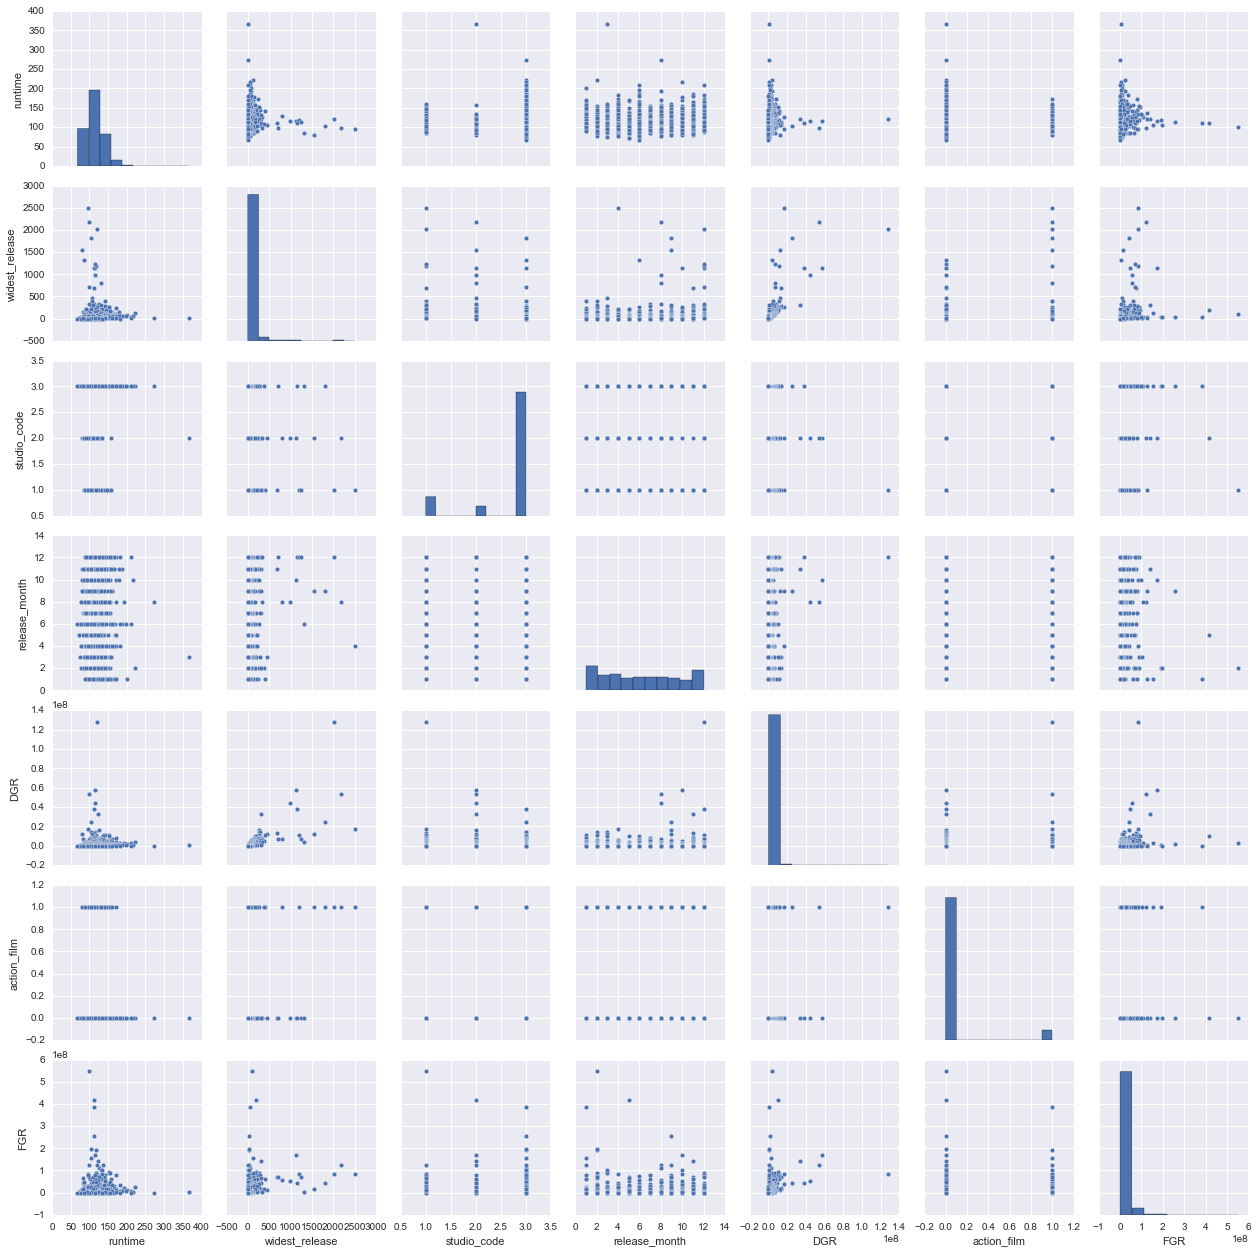

In [759]:
sns.pairplot(test_df[['runtime', 'widest_release', 'studio_code', 'release_month', 'DGR', 'action_film', 'FGR']])

In [760]:

y, X = patsy.dmatrices('DGR ~ runtime + I(runtime**2) + I(runtime**3) + I(runtime**3) + I(runtime**4) + (FGR*runtime)+ widest_release + action_film + studio_code + studio_code^2 + FGR',  data=test_df, return_type="dataframe")
#y, X = patsy.dmatrices('DGR ~ + runtime + widest_release + action_film + studio_code + release_month + FGR',  data=test_df, return_type="dataframe")

In [761]:
print(X.shape)
print(y.shape)

(788, 11)
(788, 1)


In [729]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [763]:
import statsmodels.api as sm

# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DGR   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     99.27
Date:                Fri, 07 Oct 2016   Prob (F-statistic):          1.29e-131
Time:                        14:18:44   Log-Likelihood:                -13118.
No. Observations:                 788   AIC:                         2.626e+04
Df Residuals:                     777   BIC:                         2.631e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -2.045e+07   1.26e+07     -1.627      0.104     -4.51e+07  4.22e+06
runtime           5.86e+05   3.23e+05      1.816      0.070     -4.75e+04  1.22e+06
I(runtime ** 2) -5160.0831   2946.164     -1.751      0.080     -1.09e+04   623.302
I(runtime ** 3)    18.3219     11.097      1.651      0.099        -3.462    40.105
I(runtime ** 4)    -0.0223      0.014     -1.560      0.119        -0.050     0.006
FGR                -0.1249      0.034     -3.711      0.000        -0.191    -0.059
FGR:runtime         0.0013      0.000      4.181      0.000         0.001     0.002
widest_release    2.21e+04    815.687     27.089      0.000      2.05e+04  2.37e+04
action_film     -1.396e+06   6.23e+05     -2.243      0.025     -2.62e+06 -1.74e+05
studio_code     -6.977e+05   3.54e+05     -1.973      0.049     -1.39e+06 -3612.734
studio_code ^ 2 -6.274e+05   3.19e+05     -1.966      0.050     -1.25e+06 -1096.046
==============================================================================
Omnibus:                     1278.718   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1596394.490
Skew:                           9.345   Prob(JB):                         0.00
Kurtosis:                     222.709   Cond. No.                     3.84e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

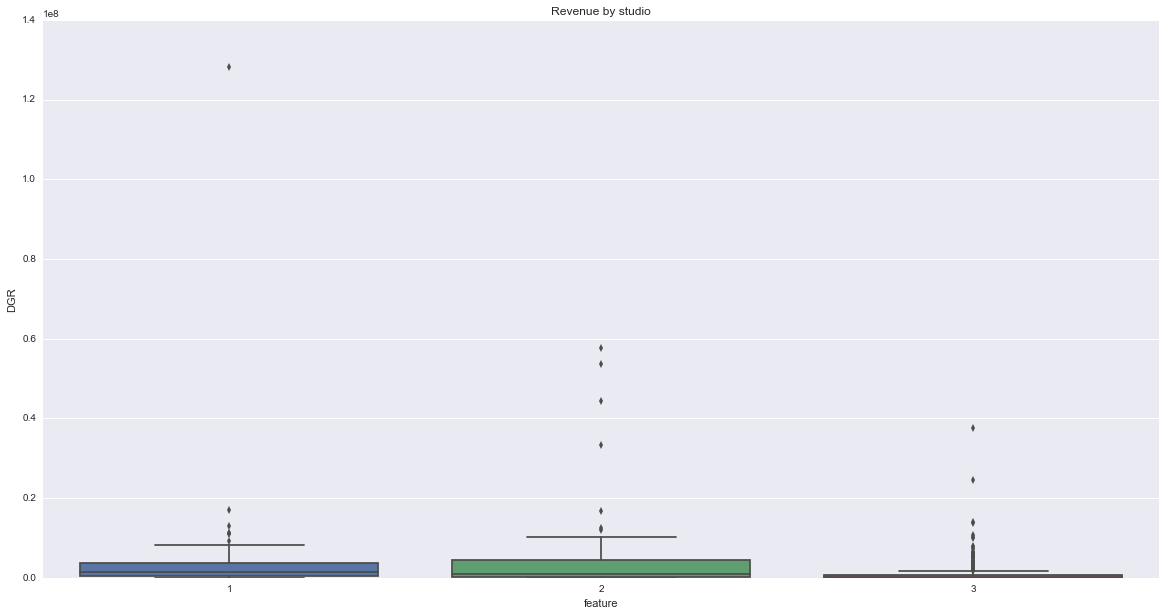

In [764]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Revenue by studio')
# set a seaborn box plot
sns.boxplot(x=test_df['studio_code'].sort_values(), y=test_df['DGR'])
ax.set_xlabel('feature')
ax.set_ylabel('DGR')

In [765]:
# Define your model with the appropriate R formula and ols()
lsm = smf.ols('DGR ~ runtime + I(runtime**2) + I(runtime**3) + I(runtime**3) + I(runtime**4) + (FGR*runtime)+ widest_release + action_film + studio_code + studio_code^2  + FGR', test_df)
# Call fit on your model
fit2 = lsm.fit()
# Call summary to print how you did
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DGR   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     99.27
Date:                Fri, 07 Oct 2016   Prob (F-statistic):          1.29e-131
Time:                        14:21:27   Log-Likelihood:                -13118.
No. Observations:                 788   AIC:                         2.626e+04
Df Residuals:                     777   BIC:                         2.631e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -2.045e+07   1.26e+07     -1.627      0.104     -4.51e+07  4.22e+06
runtime           5.86e+05   3.23e+05      1.816      0.070     -4.75e+04  1.22e+06
I(runtime ** 2) -5160.0831   2946.164     -1.751      0.080     -1.09e+04   623.302
I(runtime ** 3)    18.3219     11.097      1.651      0.099        -3.462    40.105
I(runtime ** 4)    -0.0223      0.014     -1.560      0.119        -0.050     0.006
FGR                -0.1249      0.034     -3.711      0.000        -0.191    -0.059
FGR:runtime         0.0013      0.000      4.181      0.000         0.001     0.002
widest_release    2.21e+04    815.687     27.089      0.000      2.05e+04  2.37e+04
action_film     -1.396e+06   6.23e+05     -2.243      0.025     -2.62e+06 -1.74e+05
studio_code     -6.977e+05   3.54e+05     -1.973      0.049     -1.39e+06 -3612.734
studio_code ^ 2 -6.274e+05   3.19e+05     -1.966      0.050     -1.25e+06 -1096.046
==============================================================================
Omnibus:                     1278.718   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1596394.490
Skew:                           9.345   Prob(JB):                         0.00
Kurtosis:                     222.709   Cond. No.                     3.84e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [766]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [767]:
lr = LinearRegression()

# Dump your predictors into X

features = test_df.columns.difference(["DGR"]) #difference excludes id'd 
X = test_df.loc[:, features] #.drop creates a copy of a df, .loc encompasses change across defined rows and columns
# Dump your target variables (responses) into y

y = test_df["DGR"] #response vector selected
y

0       128078872
1        57563264
2        53710019
3        44467206
4        37634615
5        33225499
6        24633730
10       17108591
11       16781387
13       13885966
14       13839658
15       12899867
16       12590147
18       12044087
20       11286112
21       11260096
22       11050094
24       10616104
25       10301706
26       10198820
27       10095170
29        9285469
32        8272296
33        8031955
34        7693187
35        7638241
36        7564459
40        7161284
41        7099055
45        6739492
          ...    
1802         4629
1805         4487
1809         4164
1810         4157
1812         4055
1813         4029
1817         3878
1822         3625
1825         3546
1827         3457
1830         3313
1831         3303
1835         3139
1837         3027
1841         2968
1847         2616
1850         2528
1853         2465
1854         2463
1858         2370
1861         2254
1869         1708
1870         1601
1871         1563
1876      

In [768]:
#empty = []
#score = 0
#for i in range(1000):
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state=41)

#fit
lr.fit(X_train, y_train)
#score
lr.score(X_test, y_test)
#score += lr.score(X_test, y_test)
#count += 1

#print(score/1000)
# 0.22

0.36824217077072929

In [685]:
test_df.corr()['DGR'].sort_values(ascending=False)

DGR               1.000000
widest_release    0.732331
FGR               0.279588
action_film       0.173016
release_month     0.112977
runtime           0.042177
studio_code      -0.209934
Name: DGR, dtype: float64

In [695]:
from sklearn.linear_model import RidgeCV

In [696]:
rcv = RidgeCV(cv=10)

In [700]:
rcv.fit(X, y)
rcv.score(X_test, y_test)

-0.56298066388568024

In [701]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example


In [702]:
rf = RandomForestRegressor()
rf.fit(X, y)
rf.feature_importances_

array([ 0.15117718,  0.00531013,  0.03938218,  0.13568214,  0.01740067,
        0.65104769])

In [703]:
sorted(zip(rf.feature_importances_),reverse=True)

[(0.65104769297278298,),
 (0.15117718153539481,),
 (0.13568214279265486,),
 (0.039382179764379972,),
 (0.017400669669047478,),
 (0.0053101332657399785,)]

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression